# Motivation

How Switzerland is handling COVID ? It seems pretty bad these days. Compared to the first wave where we were supposed to be among the best. 

But is it really the case or is there a mathematical tricks hidden behind that ? 
One idea is that when comparing countries (Switzerland, France, US) we often look at the nb of case per 100k habitants. But is it fair ? 

This notebook will try to study that fact 

In [58]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56532,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56533,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56534,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56535,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
total_cases = dict(df.groupby("location").last()["new_cases_per_million"].dropna())
population = dict(df.groupby("location").max()["population"])
sorted_case = np.array([v for k,v in sorted(total_cases.items(),key =lambda item : item[1])])

sorted_population = np.array([population[k] for k,v in sorted(total_cases.items(),key =lambda item : item[1])])

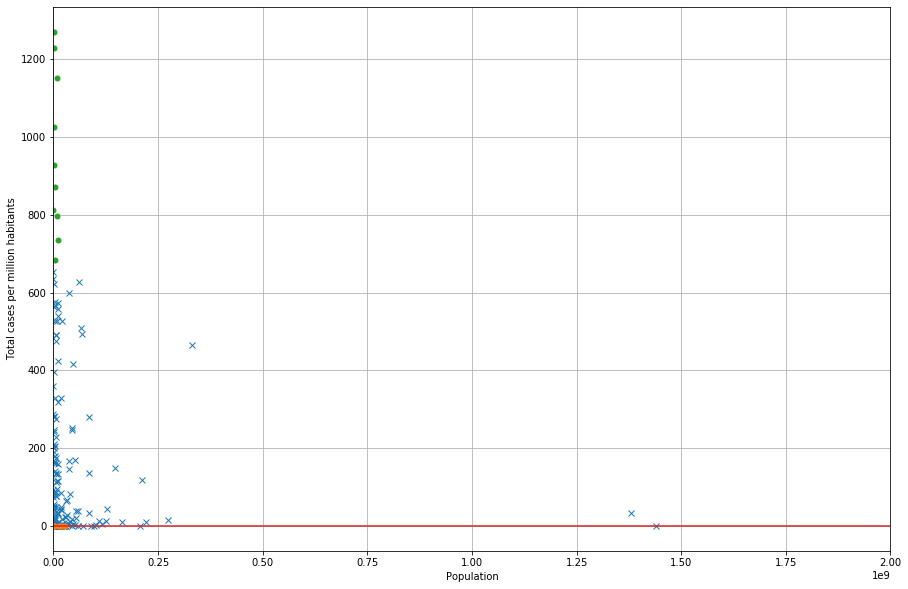

In [112]:
import matplotlib.pyplot as plt


mean = (sorted_case*sorted_population).mean()/sorted_population.sum()
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(sorted_population[10:-10],sorted_case[10:-10], 'x')
ax.plot(sorted_population[:10],sorted_case[:10], ".", markersize=10 )
ax.plot(sorted_population[-10:],sorted_case[-10:], ".", markersize=10 )
ax.plot([0,20e8], [mean,mean])
ax.set_xlim([0, 20e8])


ax.set_xlabel("Population")
ax.set_ylabel("Total cases per million habitants")

ax.grid()